In [29]:
import pandas as pd
import sklearn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import (
    accuracy_score, classification_report, recall_score, confusion_matrix,
    roc_auc_score, precision_score, f1_score, roc_curve, auc
)

In [30]:
data = pd.read_csv("../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [31]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [35]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['tenure']*data['MonthlyCharges'])

In [34]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)

In [33]:
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service':'No'})
data['MultipleLines'].value_counts()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

In [37]:
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    data[col] = data[col].replace({'No internet service':'No'})

In [38]:
data['Churn'] = data['Churn'].replace({'No':0,'Yes':1})

In [39]:
data.shape

(7043, 21)

In [40]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=64)

In [41]:
strat_split

StratifiedShuffleSplit(n_splits=1, random_state=64, test_size=0.2,
            train_size=None)

In [42]:
train_index, test_index = next(strat_split.split(data, data["Churn"]))

In [43]:
# Create train and test sets
strat_train_set = data.loc[train_index]
strat_test_set = data.loc[test_index]

In [44]:
X_train = strat_train_set.drop(columns = 'Churn')
y_train = strat_train_set['Churn']
X_test = strat_test_set.drop(columns = 'Churn')
y_test = strat_test_set['Churn']

In [45]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5634, 20), (5634,), (1409, 20), (1409,))

In [46]:
categorical_cols = strat_train_set.select_dtypes("object").columns.to_list()

In [47]:
cat_model = CatBoostClassifier(verbose=False, random_state=0, scale_pos_weight=3)
cat_model.fit(X_train, y_train, cat_features=categorical_cols, eval_set=(X_test, y_test))

In [48]:
y_pred = cat_model.predict(X_test)

In [58]:
cust_id = list(X_test.reset_index()['customerID'])

In [59]:
pd.DataFrame([cust_id,y_pred,y_test]).T

,0,1,2
0,0988-JRWWP,1,0
1,0733-VUNUW,0,1
2,5304-EFJLP,0,0
3,5482-NUPNA,0,1
4,3258-SYSWS,0,0
...,...,...,...
1404,8654-DHAOW,1,0
1405,1400-MMYXY,1,1
1406,0519-DRGTI,0,0
1407,7159-FVYPK,1,0


In [ ]:
accuracy, recall, roc_auc, precision = [round(metric(y_test, y_pred), 4) for metric in [accuracy_score, recall_score, roc_auc_score, precision_score]]


In [ ]:
score = pd.DataFrame([accuracy, recall, roc_auc, precision]).T
score.columns = ['accuracy', 'recall', 'roc_auc', 'precision']
score

,accuracy,recall,roc_auc,precision
0,0.7764,0.8262,0.7923,0.5528


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(cat_model)
shap_values_cat_train = explainer.shap_values(X_train)
shap_values_cat_test = explainer.shap_values(X_test)


NameError: name 'cat_model' is not defined

In [ ]:
X_train.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3174,6968-MHOMU,Male,0,Yes,No,58,No,No,DSL,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),45.0,2689.35


In [ ]:
from matplotlib import pyplot as plt

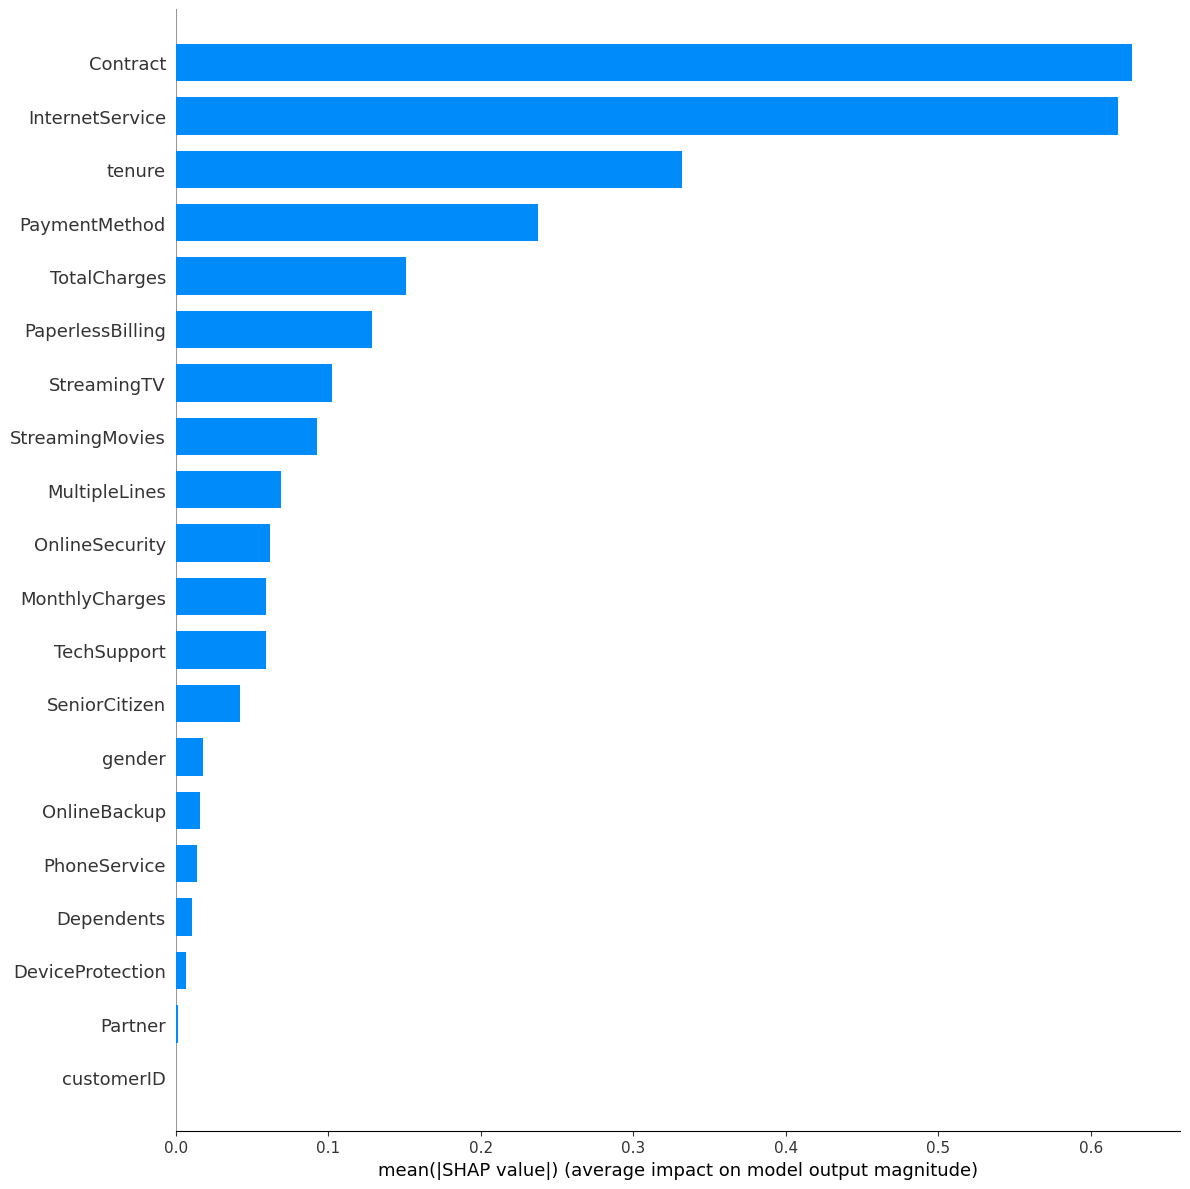

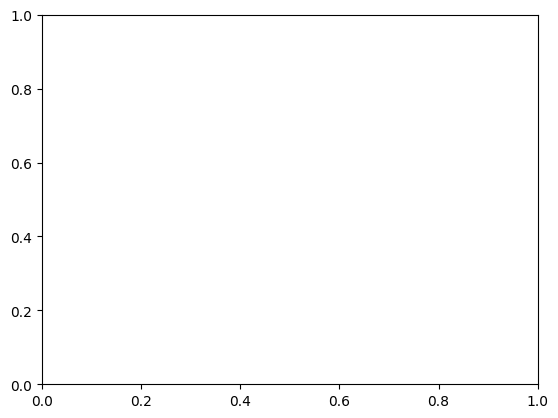

In [ ]:
shap.summary_plot(shap_values_cat_train, X_train, plot_type="bar", plot_size=(12,12))
summary_fig, _ = plt.gcf(), plt.gca()


In [ ]:
model = CatBoostClassifier()
model.load_model('C:\\Users\\Dell\\Course\\projects\\CustomerChurn\\model\\catboost_model.cbm')

In [ ]:
x_test = pd.read_pickle("../Data/X_test.pkl")

In [ ]:
model.predict(x_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)